# Bank Customer Segmentation for Loan Campaign

This activity is based on Data Science for Marketing books by Baig et al. (2019). This activity will look at a customer segmentation analysis for a bank. This segmentation will be used for a loan campaign. There are 2 main goals from this activity:
- Create customer segments for the marketing campaign. 
- Identify which of these segments have the highest propensity to respond to the campaign – information that will greatly help optimize future campaigns.

    1. Import the necessary libraries for data processing, visualization, and clustering.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans  # to perform kmeans analysis
from sklearn.preprocessing import StandardScaler  # to standardize data using z-score
from sklearn import decomposition  # the method for PCA is included in sklearn.decomposition library

    2. Load the data into a pandas DataFrame and display the top five rows. Using the info method, get an understanding of the columns and their types.

In [2]:
# load the data into a pandas dataframe
df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv', index_col='ID')

In [3]:
# print top 5 rows
df.head(5)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# print data frame info
# get to understand all columns, their null data, and it's data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


For additional information, some of the columns above show:

- Experience: The work experience of the customer in years
- Income: The estimated annual income of the customer (thousands of US dollars)
- CCAvg: The average spending on credit cards per month (thousands of US dollars)
- Mortgage: The value of the customer's house mortgage (if any)
- Age: The age (in years) of the customer

To make it analyzable, I have to rename all the columns with a proper naming convention.

In [5]:
# renaming columns based on convention

df.rename(columns = {'Age': 'age', 'Experience': 'exp', 'Income': 'income', 'ZIP Code': 'zip', 'Family': 'family',
                     'CCAvg': 'ccavg', 'Education': 'educ', 'Mortgage': 'mort', 'Personal Loan': 'loan', 'Securities Account': 'securities',
                     'CD Account': 'cd', 'Online': 'online', 'CreditCard': 'cc'}, inplace = True)

In [6]:
# check all the name again to make sure it's already renamed
df.columns

Index(['age', 'exp', 'income', 'zip', 'family', 'ccavg', 'educ', 'mort',
       'loan', 'securities', 'cd', 'online', 'cc'],
      dtype='object')

    3. Perform standard scaling of the Income, CCAvg, Age, Experience, and Mortgage columns. Get a descriptive summary of the processed columns to verify that the scaling has been applied correctly.

In [7]:
from sklearn.preprocessing import StandardScaler  # write again to make the script tidier with their respective library
scaler = StandardScaler()  # define the method for StandardScaler

cols_to_scale = ['income', 'ccavg', 'age', 'exp', 'mort']
df_scaled = df.copy()  # to make duplicate, retain the original value in df

In [8]:
# standardize variable
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

In [9]:
# make sure that all the variables already standardized 
df_scaled[cols_to_scale].describe()

,income,ccavg,age,exp,mort
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.939449e-16,-2.078338e-17,2.478018e-17,-1.693312e-16,2.810197e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00,-1.948906e+00,-2.014911e+00,-5.555239e-01
25%,-7.554825e-01,-7.084116e-01,-9.019702e-01,-8.812043e-01,-5.555239e-01
50%,-2.123482e-01,-2.506106e-01,-2.952359e-02,-9.121982e-03,-5.555239e-01
75%,5.263146e-01,3.216407e-01,8.429230e-01,8.629604e-01,4.375576e-01
max,3.263712e+00,4.613525e+00,1.889859e+00,1.996667e+00,5.688108e+00


    4. Perform k-means clustering, specifying 3 clusters using the scaled features. Specify random_state as 42 to ensure the consistency of the results. Create a new column, Cluster, containing the predicted cluster from the model. Then perform a visualization based on their columns to make the clusters.

In [10]:
from sklearn.cluster import KMeans  # write again to make the script tidier with their respective library

n = 3
model = KMeans(n_clusters=n, random_state=42)  # define the model for k means

model.fit(df_scaled[cols_to_scale])  # 1. fitting the model to the data
df_scaled['cluster_ori'] = model.predict(df_scaled[cols_to_scale])  # 2. predicting the cluster

    5. Using PCA on the scaled columns, create two new columns, pc1 and pc2, containing the data for PC1 and PC2 respectively.

In [11]:
from sklearn import decomposition  # write again to make the script tidier with their respective library

n = 2  # how many variables we're going to make after reduction
pca = decomposition.PCA(n_components=n)
pca_res = pca.fit_transform(df_scaled[cols_to_scale])

df_scaled['pc1'] = pca_res[:, 0]
df_scaled['pc2'] = pca_res[:, 1]

    6. Visualize the clusters by using different markers for the clusters on a scatter plot between pc1 and pc2.

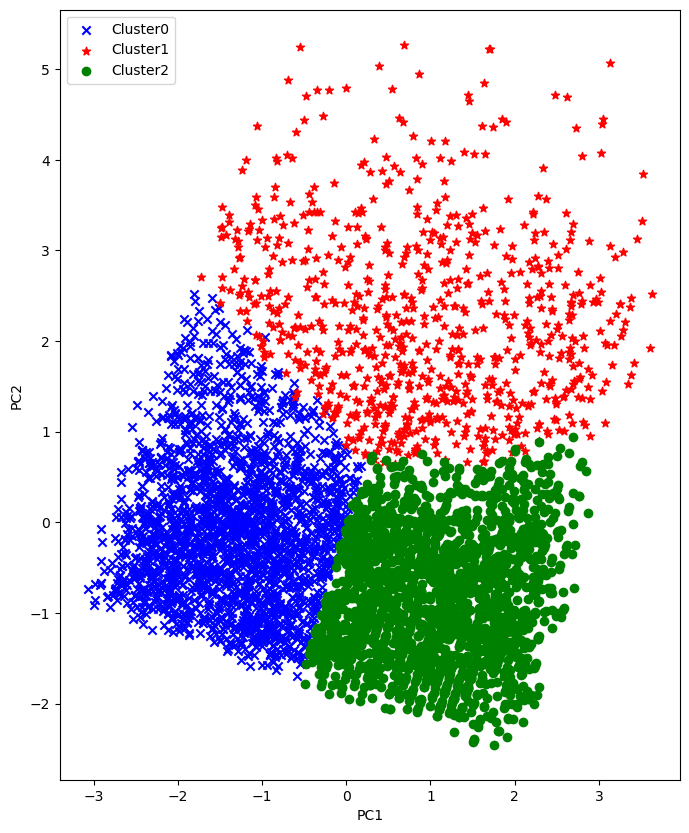

In [12]:
markers = ['x', '*', 'o']  # markers for plot, based on how many segmentations we made, in this case 3
colors = ['blue', 'red', 'green']

plt.figure(figsize=(8, 10))

for clust, color in zip(range(len(markers)), colors):  # make loops to make the principal compomnents plot
    temp = df_scaled[df_scaled['cluster_ori'] == clust]  # filter the data to only for one specific cluster
    plt.scatter(temp['pc1'], temp['pc2'], marker=markers[clust], label='Cluster' + str(clust), color=color)
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

    7. To understand the clusters, print the average values of the features used for clustering against the three clusters. Check which features are the most differentiated for the clusters.

In [13]:
# append the cluster_ori to the dataframe with original value
df = pd.merge(df, df_scaled['cluster_ori'], left_index=True, right_index=True)
df.head()

,age,exp,income,zip,family,ccavg,educ,mort,loan,securities,cd,online,cc,cluster_ori
ID,,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,2
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,2
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,2
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,2
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,2


<AxesSubplot:title={'center':'with standardized value'}, xlabel='cluster_ori'>

<AxesSubplot:title={'center':'without standardized value'}, xlabel='cluster_ori'>

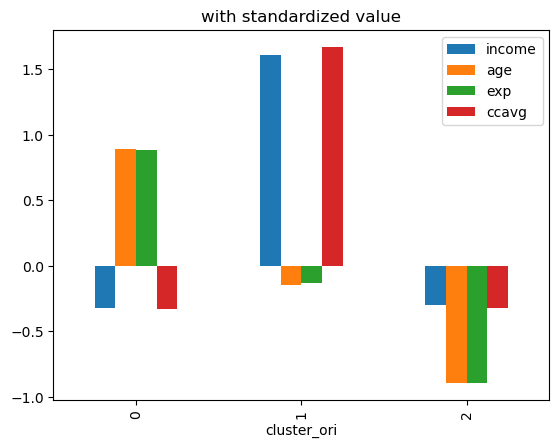

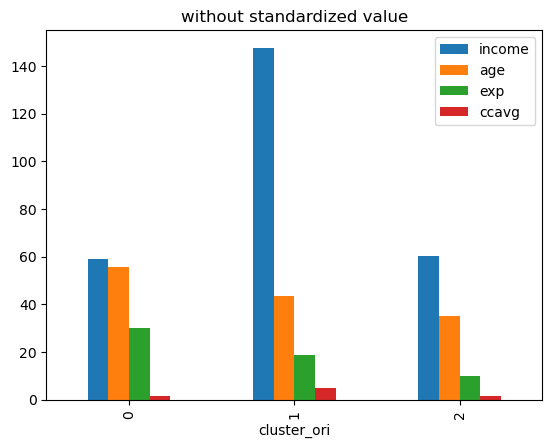

In [23]:
# visualize to make it clearer
# we should see a clear pattern between clusters if we make a visualiztion

display(df_scaled.groupby('cluster_ori')[['income', 'age', 'exp', 'ccavg']].mean().plot(kind='bar', title='with standardized value'))
display(df.groupby('cluster_ori')[['income', 'age', 'exp', 'ccavg']].mean().plot(kind='bar', title='without standardized value'))

    8. To understand the clusters better using other relevant features, print the average values against the clusters for the Age, Mortgage, Family, CreditCard, Online, and Personal Loan features and check which cluster has the highest propensity for taking a personal loan.

<AxesSubplot:title={'center':'with standardized value'}, xlabel='cluster_ori'>

<AxesSubplot:title={'center':'without standardized value'}, xlabel='cluster_ori'>

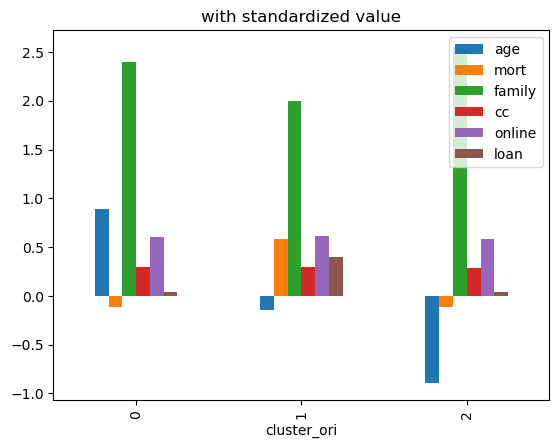

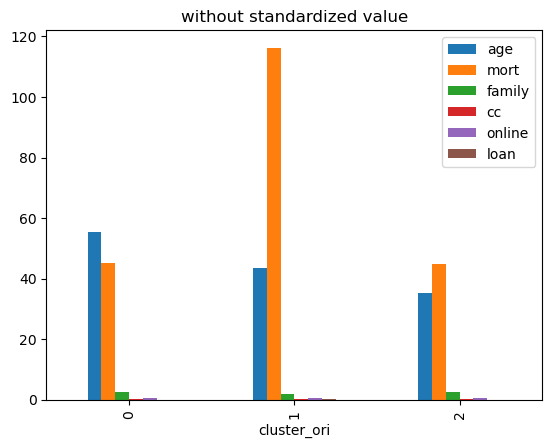

In [20]:
cols_to_plot = ['age', 'mort', 'family', 'cc', 'online', 'loan']
display(df_scaled.groupby('cluster_ori')[cols_to_plot].mean().plot(kind='bar', title='with standardized value'))
display(df.groupby('cluster_ori')[cols_to_plot].mean().plot(kind='bar', title='without standardized value'))

    9. Based on your understanding of the clusters, assign descriptive labels to the clusters.

From all the clusters above, I can make a descriptive label for them based on their behavior and persona:

1. Cluster 0 -> Pensiooner
2. Cluster 1 -> High level executive
3. Cluster 2 -> Low-to-mid level executive

As high-level executives are in their peak career, no wonder their income is really big thus making them really active with their credit card. While for the low-to-mid level executive, as they just entered working world, their income are in average level, thus making they are quite careful with their spending. For pensioneer, as they just retired, they still have an income which is only slightly higher than the low-to-mid level executive, they are also not really active with credit card even though.

# Summary

Thus, this is the way to perform K-Means clustering, **assuming that we already know how many group of segmentations from the population**. All in all, the steps are as following:

1. Perform standard scaling for all the variables we're going to include in the model
2. Perform the K-Means clustering by specifying the algorithm for distance, random state, and the data we're going to include
3. For multiple dimensions, reduce the dimensionality of the variables (here, I used PCA) to visualize the clusters clearly
4. To interpret the results and label the clusters, plot all the characteristic variables by the clusters, then compare.